# <u>__Car Details__

## Overview:
The "Car Details" dataset provides a synthetic but realistic snapshot of the details of cars, particularly focusing on the selling prices and how it is affected by other factors.This dataset includes 8128 rows and 13 columns, which are name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats. It is designed to be a valuable resource for researchers, data scientists, and even just a normal person to exlore the price of different cars and all the other features. 

## Dataset Features:
### name:

##### <u>Description</u>: The company and model of car.
Type: Numerical

### year:

##### <u>Description</u>: The year the car was released.
Type: Numerical

### selling_price:

##### <u>Description</u>: The price of the car.
Type: Numerical

### km_driven:

##### <u>Description</u>: The odometer reading.
Type: Numerical

### fuel:

##### <u>Description</u>: The type of fuel the car consumes, either petrol or deisel.
Type: Categorical

### seller_type:

##### <u>Description</u>: The type of seller.
Type: Categorical

### transmission:

##### <u>Description</u>: Whether it is automatic or manual.
Type: Categorical

### Owner:

##### <u>Description</u>: Which owner is selling, like first owner, second owner and so on.
Type: Categorical

### mileage:

##### <u>Description</u>: The distance(in km) the car can cover per litre of fuel.
Type: Numerical

### engine:

##### <u>Description</u>: The size(in cc) of engine.
Type: Numerical

### max_power:

##### <u>Description</u>: The horsepower that the car exerts.
Type: Numerical

### torque:

##### <u>Description</u>: The car's ability to work.
Type: Numerical

### seats:

##### <u>Description</u>: The number of seats.
Type: Numerical

### Potential Use Cases:
* *Price Prediction*: Predict car prices based on features like make, model, year, and mileage.
- *Car Recommendation*: Suggest cars to buyers based on preferences and budget.

### __Notes:__ __This dataset is entirely synthetic and generated for educational and research purposes. While it mimics real-world data, it does not represent any actual company, job, or individual. The data can be used to model, predict, and analyze trends in the AI-driven job market but should not be used for real-world decision-making without validation against actual data.__

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
z=pd.read_csv('C:/Users/Administrator/Desktop/Car_details.csv')
z

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
z['mileage'].unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [6]:
z['mileage'] = pd.to_numeric(z['mileage'].str.replace('kmpl', '').str.replace('kg', ''), errors='coerce')



In [7]:
z['mileage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8128 entries, 0 to 8127
Series name: mileage
Non-Null Count  Dtype  
--------------  -----  
7819 non-null   float64
dtypes: float64(1)
memory usage: 63.6 KB


In [8]:
z

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
z['torque'] = pd.to_numeric(z['torque'].str.split().str[0].str.replace('Nm@', ''), errors='coerce')


In [10]:
z['torque'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8128 entries, 0 to 8127
Series name: torque
Non-Null Count  Dtype  
--------------  -----  
7151 non-null   float64
dtypes: float64(1)
memory usage: 63.6 KB


In [11]:
z['engine'] = z['engine'].str.replace('CC', '').astype(float)


In [12]:
z['max_power'] = pd.to_numeric(z['max_power'].str.replace('bhp', '').str.strip(), errors='coerce')

In [13]:
z['engine'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8128 entries, 0 to 8127
Series name: engine
Non-Null Count  Dtype  
--------------  -----  
7907 non-null   float64
dtypes: float64(1)
memory usage: 63.6 KB


In [14]:
z['max_power'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8128 entries, 0 to 8127
Series name: max_power
Non-Null Count  Dtype  
--------------  -----  
7912 non-null   float64
dtypes: float64(1)
memory usage: 63.6 KB


In [15]:
z

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,NaN,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,NaN,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.0,5.0


In [16]:
z.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          309
engine           221
max_power        216
torque           977
seats            221
dtype: int64

<Axes: xlabel='torque'>

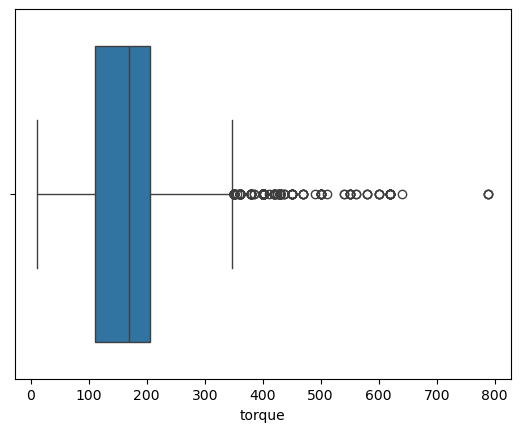

In [17]:
sns.boxplot(x=z['torque'])

In [18]:
z['torque'].sort_values(ascending=True)

226     11.4
2257    11.4
2320    11.4
6992    11.4
3469    11.4
        ... 
8104     NaN
8105     NaN
8108     NaN
8113     NaN
8124     NaN
Name: torque, Length: 8128, dtype: float64

In [19]:
a=z.torque.median()
a

170.0

In [20]:
z.torque.fillna(a,inplace=True)
z.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          309
engine           221
max_power        216
torque             0
seats            221
dtype: int64

<Axes: xlabel='mileage'>

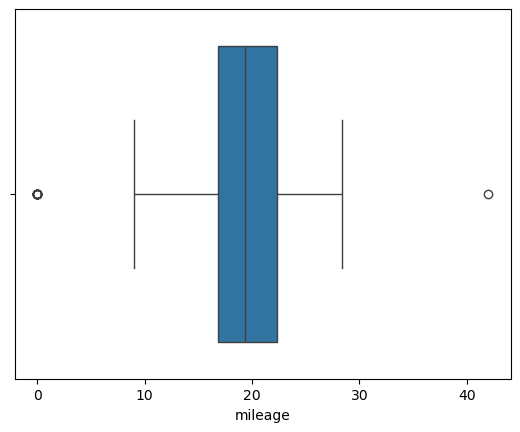

In [21]:
sns.boxplot(x=z['mileage'])

In [22]:
z['mileage'].sort_values(ascending=True)

4527    0.0
2725    0.0
6824    0.0
785     0.0
6629    0.0
       ... 
7913    NaN
7996    NaN
8009    NaN
8068    NaN
8103    NaN
Name: mileage, Length: 8128, dtype: float64

In [23]:
a=z.mileage.median()
a

19.3

In [24]:
z.mileage.fillna(a,inplace=True)

In [25]:
z.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine           221
max_power        216
torque             0
seats            221
dtype: int64

<Axes: xlabel='seats'>

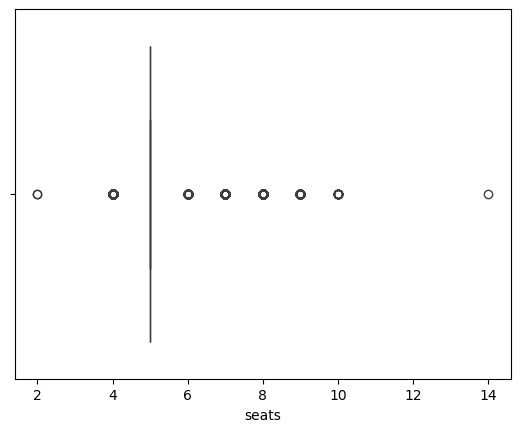

In [26]:
sns.boxplot(x=z['seats'])

In [27]:
z['seats'].sort_values(ascending=True)

5900    2.0
6629    2.0
6161    4.0
7624    4.0
4178    4.0
       ... 
7846    NaN
7996    NaN
8009    NaN
8068    NaN
8103    NaN
Name: seats, Length: 8128, dtype: float64

In [28]:
a=z.seats.median()
a

5.0

In [29]:
z.seats.fillna(a,inplace=True)

<Axes: xlabel='engine'>

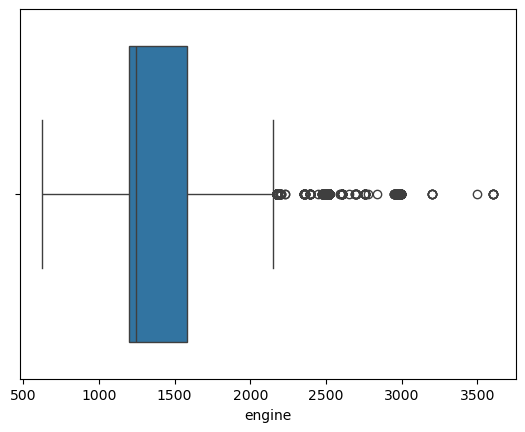

In [30]:
sns.boxplot(x=z['engine'])

In [31]:
z['engine'].sort_values(ascending=True)

6738    624.0
1217    624.0
5878    624.0
3709    624.0
6817    624.0
        ...  
7846      NaN
7996      NaN
8009      NaN
8068      NaN
8103      NaN
Name: engine, Length: 8128, dtype: float64

In [32]:
a=z.engine.median()
a

1248.0

In [33]:
z.engine.fillna(a,inplace=True)

<Axes: xlabel='max_power'>

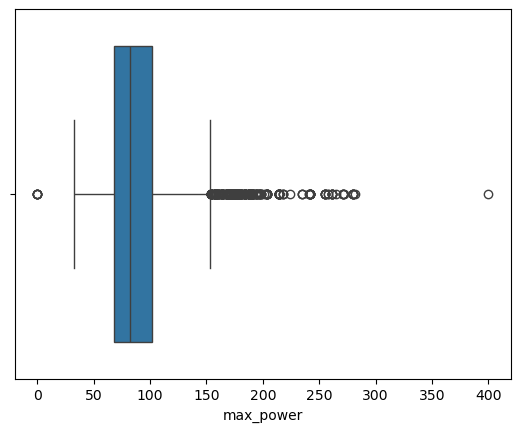

In [34]:
sns.boxplot(x=z['max_power'])

In [35]:
z['max_power'].sort_values(ascending=True)

576     0.0
2550    0.0
2549    0.0
575     0.0
1443    0.0
       ... 
7846    NaN
7996    NaN
8009    NaN
8068    NaN
8103    NaN
Name: max_power, Length: 8128, dtype: float64

In [36]:
a=z.max_power.median()
a

82.0

In [37]:
z.max_power.fillna(a,inplace=True)

In [38]:
z.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [39]:
df1=z.select_dtypes(exclude=['object'])
df1

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
0,2014,450000,145500,23.40,1248.0,74.00,190.0,5.0
1,2014,370000,120000,21.14,1498.0,103.52,250.0,5.0
2,2006,158000,140000,17.70,1497.0,78.00,170.0,5.0
3,2010,225000,127000,23.00,1396.0,90.00,22.4,5.0
4,2007,130000,120000,16.10,1298.0,88.20,170.0,5.0
...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,82.85,113.7,5.0
8124,2007,135000,119000,16.80,1493.0,110.00,170.0,5.0
8125,2009,382000,120000,19.30,1248.0,73.90,190.0,5.0
8126,2013,290000,25000,23.57,1396.0,70.00,140.0,5.0


In [40]:
q1=df1.quantile(0.25)
q3=df1.quantile(0.75)
q1

year               2011.0
selling_price    254999.0
km_driven         35000.0
mileage              16.8
engine             1197.0
max_power            68.1
torque              113.0
seats                 5.0
Name: 0.25, dtype: float64

In [41]:
q3

year               2017.00
selling_price    675000.00
km_driven         98000.00
mileage              22.07
engine             1582.00
max_power           101.25
torque              200.00
seats                 5.00
Name: 0.75, dtype: float64

In [42]:
iqr=q3-q1
iqr

year                  6.00
selling_price    420001.00
km_driven         63000.00
mileage               5.27
engine              385.00
max_power            33.15
torque               87.00
seats                 0.00
dtype: float64

In [43]:
b=(df1<(q1-1.5*iqr))|(df1>(q3+1.5*iqr))
b

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8123,False,False,False,False,False,False,False,False
8124,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False


In [44]:
df=z[~(b).any(axis=1)]
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,170.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,170.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,170.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.0,5.0


In [45]:
z.shape,df.shape

((8128, 13), (5826, 13))

(array([192., 528., 583., 648., 743., 457., 469., 403., 499., 384., 264.,
        206., 153.,  89.,  78.,  40.,  36.,  20.,  20.,  14.]),
 array([  33351.  ,   96683.45,  160015.9 ,  223348.35,  286680.8 ,
         350013.25,  413345.7 ,  476678.15,  540010.6 ,  603343.05,
         666675.5 ,  730007.95,  793340.4 ,  856672.85,  920005.3 ,
         983337.75, 1046670.2 , 1110002.65, 1173335.1 , 1236667.55,
        1300000.  ]),
 <BarContainer object of 20 artists>)

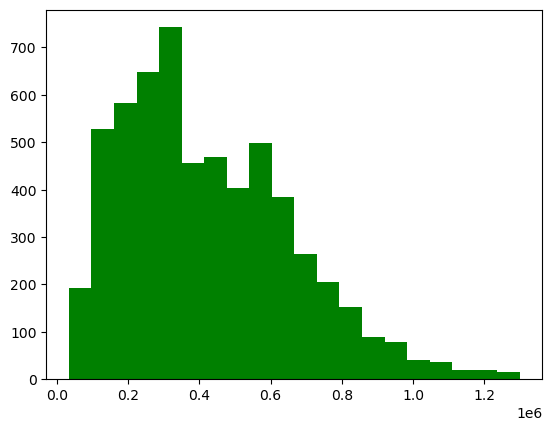

In [46]:
plt.hist(df['selling_price'],bins=20,color='green')

In [47]:
df.groupby(['owner']).count()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats
owner,,,,,,,,,,,,
First Owner,3802,3802,3802,3802,3802,3802,3802,3802,3802,3802,3802,3802
Fourth & Above Owner,114,114,114,114,114,114,114,114,114,114,114,114
Second Owner,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496,1496
Third Owner,414,414,414,414,414,414,414,414,414,414,414,414


In [48]:
a=df.groupby(['owner']).size().reset_index(name='count').rename(columns={'owner':'Owner'})
a

,Owner,count
0,First Owner,3802
1,Fourth & Above Owner,114
2,Second Owner,1496
3,Third Owner,414


<BarContainer object of 4 artists>

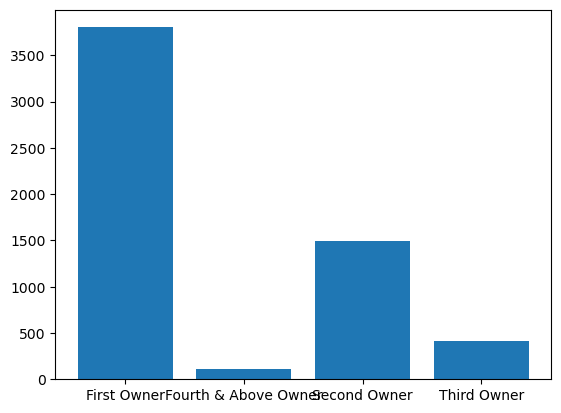

In [49]:
plt.bar(a['Owner'],a['count'])

In [50]:
a['Percentage']=a['count']/sum(a['count'])*100
a

,Owner,count,Percentage
0,First Owner,3802,65.259183
1,Fourth & Above Owner,114,1.956746
2,Second Owner,1496,25.677995
3,Third Owner,414,7.106076


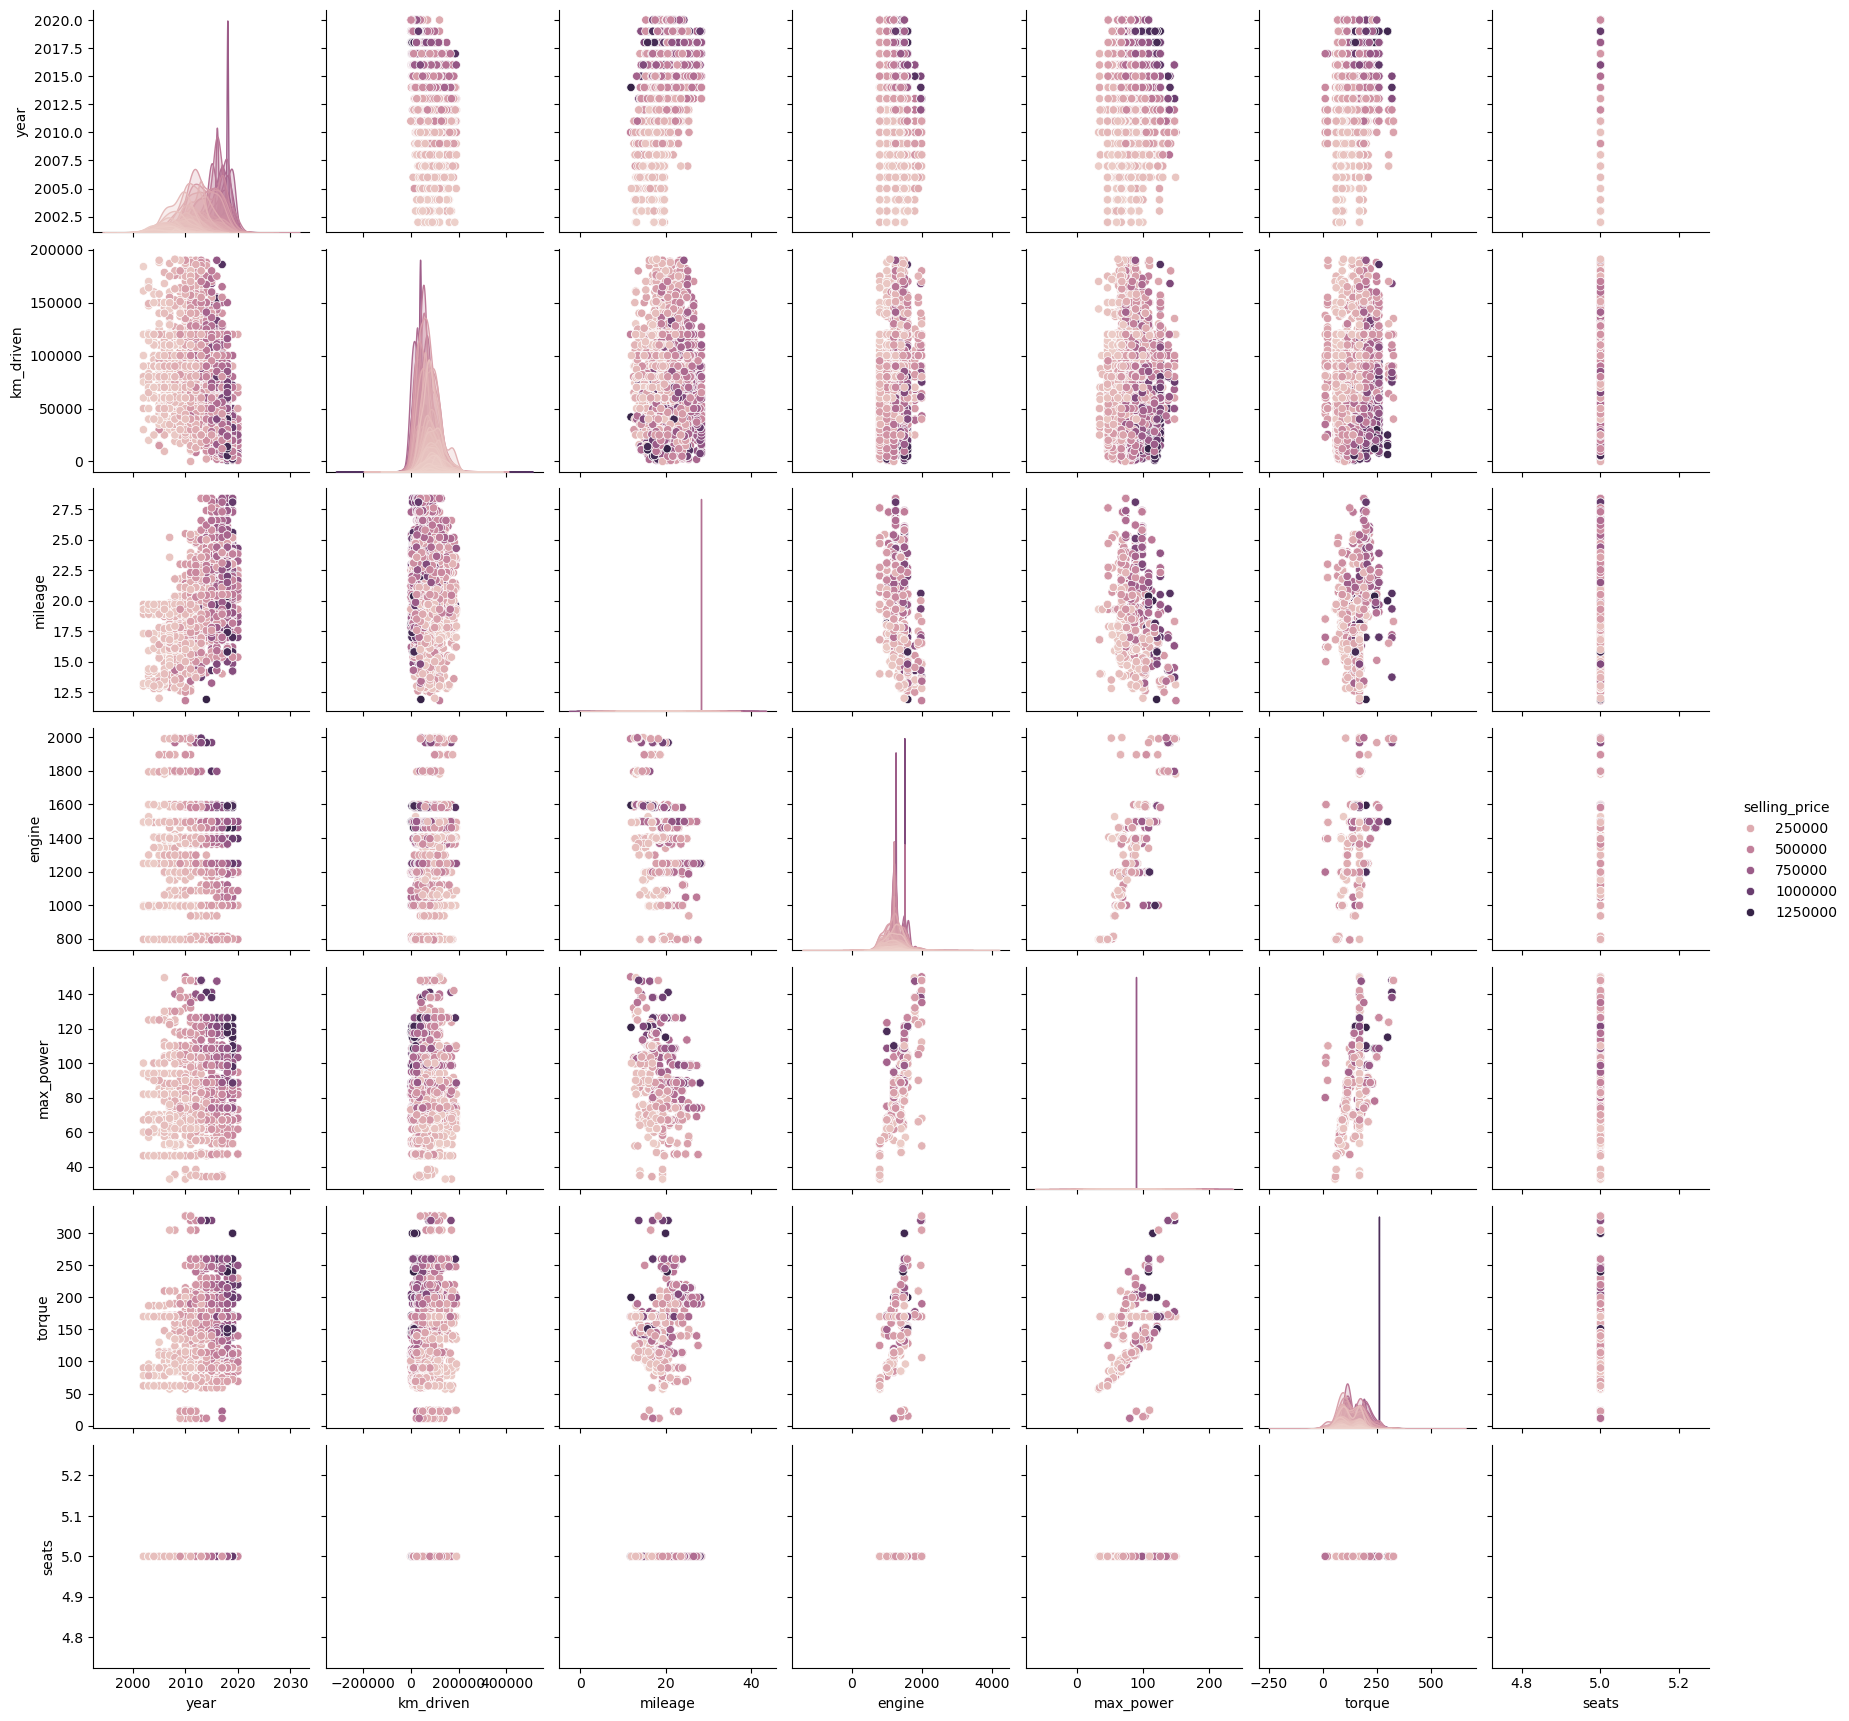

In [51]:
sns.pairplot(df,hue='selling_price')

In [52]:
df1=df.select_dtypes(exclude=['object'])

In [53]:
df1

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
0,2014,450000,145500,23.40,1248.0,74.00,190.0,5.0
1,2014,370000,120000,21.14,1498.0,103.52,250.0,5.0
2,2006,158000,140000,17.70,1497.0,78.00,170.0,5.0
3,2010,225000,127000,23.00,1396.0,90.00,22.4,5.0
4,2007,130000,120000,16.10,1298.0,88.20,170.0,5.0
...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,82.85,113.7,5.0
8124,2007,135000,119000,16.80,1493.0,110.00,170.0,5.0
8125,2009,382000,120000,19.30,1248.0,73.90,190.0,5.0
8126,2013,290000,25000,23.57,1396.0,70.00,140.0,5.0


In [54]:
df1=df1.drop(columns='seats')

In [55]:
df1.corr()

,year,selling_price,km_driven,mileage,engine,max_power,torque
year,1.000000,0.723499,-0.544712,0.414836,-0.036754,0.137883,0.070762
selling_price,0.723499,1.000000,-0.389722,0.269387,0.359889,0.537292,0.423824
km_driven,-0.544712,-0.389722,1.000000,-0.080741,0.220696,0.011957,0.234183
mileage,0.414836,0.269387,-0.080741,1.000000,-0.190526,-0.193613,0.201636
engine,-0.036754,0.359889,0.220696,-0.190526,1.000000,0.812045,0.698993
max_power,0.137883,0.537292,0.011957,-0.193613,0.812045,1.000000,0.608684
torque,0.070762,0.423824,0.234183,0.201636,0.698993,0.608684,1.000000


<Axes: >

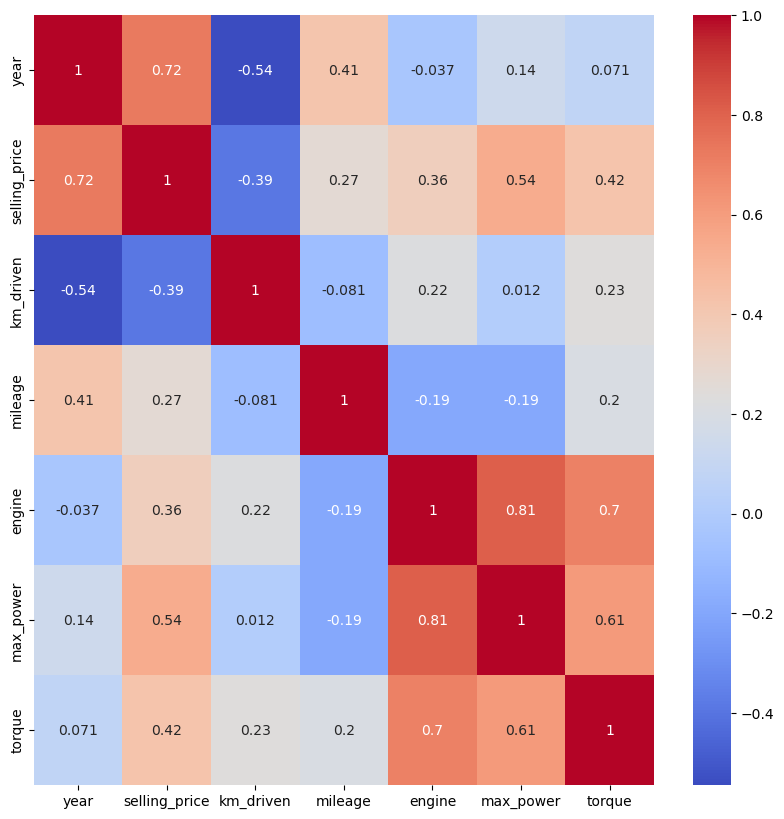

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

Text(0.5, 1.0, 'Correlation between year it was released to km driven')

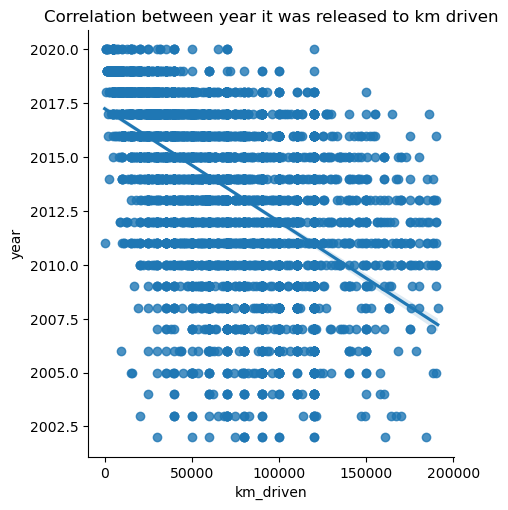

In [57]:
sns.lmplot(x='km_driven',y='year',data=df1)
plt.title('Correlation between year it was released to km driven')

Text(0.5, 1.0, 'Correlation between engine cc and maximum power it can excert')

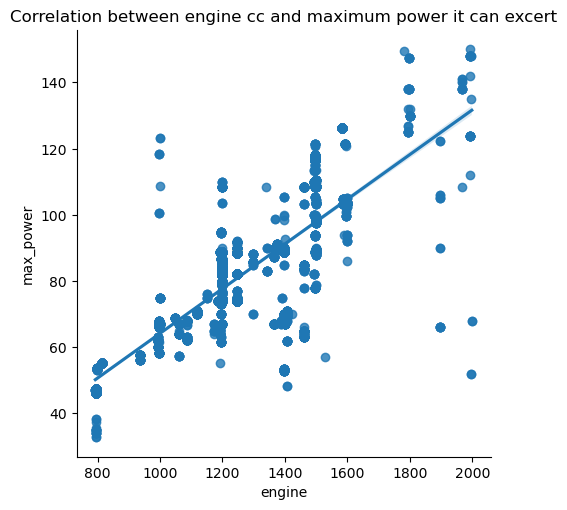

In [58]:
sns.lmplot(x='engine',y='max_power',data=df1)
plt.title('Correlation between engine cc and maximum power it can excert')

In [59]:
df1

,year,selling_price,km_driven,mileage,engine,max_power,torque
0,2014,450000,145500,23.40,1248.0,74.00,190.0
1,2014,370000,120000,21.14,1498.0,103.52,250.0
2,2006,158000,140000,17.70,1497.0,78.00,170.0
3,2010,225000,127000,23.00,1396.0,90.00,22.4
4,2007,130000,120000,16.10,1298.0,88.20,170.0
...,...,...,...,...,...,...,...
8123,2013,320000,110000,18.50,1197.0,82.85,113.7
8124,2007,135000,119000,16.80,1493.0,110.00,170.0
8125,2009,382000,120000,19.30,1248.0,73.90,190.0
8126,2013,290000,25000,23.57,1396.0,70.00,140.0


In [60]:
x=df1.drop(columns=['year','selling_price'])
y=df1['selling_price']
x

,km_driven,mileage,engine,max_power,torque
0,145500,23.40,1248.0,74.00,190.0
1,120000,21.14,1498.0,103.52,250.0
2,140000,17.70,1497.0,78.00,170.0
3,127000,23.00,1396.0,90.00,22.4
4,120000,16.10,1298.0,88.20,170.0
...,...,...,...,...,...
8123,110000,18.50,1197.0,82.85,113.7
8124,119000,16.80,1493.0,110.00,170.0
8125,120000,19.30,1248.0,73.90,190.0
8126,25000,23.57,1396.0,70.00,140.0


In [61]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 5826, dtype: int64

In [62]:
from sklearn.feature_selection import f_classif
a=f_classif(x,y)
a

(array([3.82887898, 4.19194553, 3.21322149, 6.63005358, 4.13584628]),
 array([1.47843899e-127, 1.90094056e-148, 1.18314030e-092, 2.23819399e-287,
        3.26645125e-145]))

In [63]:
a=pd.Series(a[1])
a.index=x.columns
a

km_driven    1.478439e-127
mileage      1.900941e-148
engine        1.183140e-92
max_power    2.238194e-287
torque       3.266451e-145
dtype: float64

In [64]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,170.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,170.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,170.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,190.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140.0,5.0


In [65]:
df.name.unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ...,
       'Tata Manza Aura (ABS) Safire BS IV', 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV'], dtype=object)

In [66]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [67]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [68]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [69]:
df.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [70]:
df.seats.unique()

array([5.])

In [71]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [72]:
df['fuel']=l.fit_transform(df['fuel'])
df['seller_type']=l.fit_transform(df['seller_type'])
df['transmission']=l.fit_transform(df['transmission'])
df['owner']=l.fit_transform(df['owner'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_23340\643564686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel']=l.fit_transform(df['fuel'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_23340\643564686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type']=l.fit_transform(df['seller_type'])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_23340\643564686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [73]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,1,3,17.70,1497.0,78.00,170.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,170.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,3,1,1,0,18.50,1197.0,82.85,113.7,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,1,16.80,1493.0,110.00,170.0,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,0,19.30,1248.0,73.90,190.0,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,0,23.57,1396.0,70.00,140.0,5.0


In [74]:
df.owner.unique()

array([0, 2, 3, 1])

In [75]:
df=df.drop(columns=['name','seats'])
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,190.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,250.0
2,2006,158000,140000,3,1,1,3,17.70,1497.0,78.00,170.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,22.4
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,170.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,3,1,1,0,18.50,1197.0,82.85,113.7
8124,2007,135000,119000,1,1,1,1,16.80,1493.0,110.00,170.0
8125,2009,382000,120000,1,1,1,0,19.30,1248.0,73.90,190.0
8126,2013,290000,25000,1,1,1,0,23.57,1396.0,70.00,140.0


In [76]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
x=df.drop(columns=['selling_price'])
y=df['selling_price']
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,2014,145500,1,1,1,0,23.40,1248.0,74.00,190.0
1,2014,120000,1,1,1,2,21.14,1498.0,103.52,250.0
2,2006,140000,3,1,1,3,17.70,1497.0,78.00,170.0
3,2010,127000,1,1,1,0,23.00,1396.0,90.00,22.4
4,2007,120000,3,1,1,0,16.10,1298.0,88.20,170.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,1,1,0,18.50,1197.0,82.85,113.7
8124,2007,119000,1,1,1,1,16.80,1493.0,110.00,170.0
8125,2009,120000,1,1,1,0,19.30,1248.0,73.90,190.0
8126,2013,25000,1,1,1,0,23.57,1396.0,70.00,140.0


In [78]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 5826, dtype: int64

In [79]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [81]:
rf=RandomForestRegressor()
param_grid = {
    'n_estimators': [500,1000,2000],
    'max_depth': [15,20,25],
    'min_samples_split': [5,7,8]
}


In [82]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='neg_mean_squared_error')

In [83]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20, 25],
                         'min_samples_split': [5, 7, 8],
                         'n_estimators': [500, 1000, 2000]},
             scoring='neg_mean_squared_error')

In [84]:
grid_search.best_params_

{'max_depth': 25, 'min_samples_split': 5, 'n_estimators': 2000}

In [85]:
grid_search.best_score_

-5186956865.589182

In [86]:
pr=grid_search.predict(x_test)
print(f"Error rate this model is getting={mean_squared_error(y_test,pr)}") 
print(f"But the performance of this model is={r2_score(y_test,pr)}")

Error rate this model is getting=5415706726.6983385
But the performance of this model is=0.9053168527476099


In [260]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [262]:
pr=rf.predict(x_test)
mean_squared_error(y_test,pr), r2_score(y_test,pr)

(5508845947.504692, 0.9036884937903004)

In [263]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [264]:
pr=dt_regressor.predict(x_test)
mean_squared_error(y_test,pr) , r2_score(y_test,pr)

(9611318056.65478, 0.8319647113900135)

In [265]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [271]:
param={'n_neighbors' : [3,5,7,9],
       'weights' : ['uniform','distance'],
       'algorithm' : ['auto','ball_tree']}

In [273]:
knn1=GridSearchCV(knn,param,cv=5,scoring='neg_mean_squared_error')
knn1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [274]:
knn1.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}

In [275]:
knn1.best_score_

-7777108089.970784

In [276]:
pr=knn1.predict(x_test)
mean_squared_error(y_test,pr) , r2_score(y_test,pr)

(8096815730.99104, 0.858442852462163)

In [287]:
#From this we can say the best option is to go for Random Forest Regressor

In [288]:
import joblib
joblib.dump(grid_search,'C:/Users/Administrator/Documents/MILESTONE/Cars_RandomForestRegressor.pkl')

['C:/Users/Administrator/Documents/MILESTONE/Cars_RandomForestRegressor.pkl']

#### To use this trained model in future use joblib.load